<a href="https://colab.research.google.com/github/salonisuman06/Chatbot-for-Mental-Health/blob/main/ChatbotforMentalHealth.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
#importing files from system 
from google.colab import files
files.upload()

Saving Mental_Health_FAQ.csv to Mental_Health_FAQ (3).csv


{'Mental_Health_FAQ.csv': b'Question_ID,Questions,Answers\r\n1590140,What does it mean to have a mental illness?,"Mental illnesses are health conditions that disrupt a person\xc3\xa2\xe2\x82\xac\xe2\x84\xa2s thoughts, emotions, relationships, and daily functioning. They are associated with distress and diminished capacity to engage in the ordinary activities of daily life.\nMental illnesses fall along a continuum of severity: some are fairly mild and only interfere with some aspects of life, such as certain phobias. On the other end of the spectrum lie serious mental illnesses, which result in major functional impairment and interference with daily life. These include such disorders as major depression, schizophrenia, and bipolar disorder, and may require that the person receives care in a hospital.\nIt is important to know that mental illnesses are medical conditions that have nothing to do with a person\xc3\xa2\xe2\x82\xac\xe2\x84\xa2s character, intelligence, or willpower. Just as d

In [44]:
#Required packages in this dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

#loading dataset
df=pd.read_csv("/content/Mental_Health_FAQ.csv")
df

,Question_ID,Questions,Answers
0,1590140,What does it mean to have a mental illness?,Mental illnesses are health conditions that di...
1,2110618,Who does mental illness affect?,It is estimated that mental illness affects 1 ...
2,6361820,What causes mental illness?,It is estimated that mental illness affects 1 ...
3,9434130,What are some of the warning signs of mental i...,Symptoms of mental health disorders vary depen...
4,7657263,Can people with mental illness recover?,"When healing from mental illness, early identi..."
...,...,...,...
93,4373204,How do I know if I'm drinking too much?,Sorting out if you are drinking too much can b...
94,7807643,"If cannabis is dangerous, why are we legalizin...","Cannabis smoke, for example, contains cancer-c..."
95,4352464,How can I convince my kids not to use drugs?,You can't. But you can influence their capacit...
96,6521784,What is the legal status (and evidence) of CBD...,Cannabidiol or CBD is a naturally occurring co...


In [45]:
#Data Peak
dfx1=pd.DataFrame()
dfy1=pd.DataFrame()
df2=dfx1.join(dfy1)
df2.head()
df.head()

,Question_ID,Questions,Answers
0,1590140,What does it mean to have a mental illness?,Mental illnesses are health conditions that di...
1,2110618,Who does mental illness affect?,It is estimated that mental illness affects 1 ...
2,6361820,What causes mental illness?,It is estimated that mental illness affects 1 ...
3,9434130,What are some of the warning signs of mental i...,Symptoms of mental health disorders vary depen...
4,7657263,Can people with mental illness recover?,"When healing from mental illness, early identi..."


In [46]:
df.shape

(98, 3)

In [47]:
df.columns

Index(['Question_ID', 'Questions', 'Answers'], dtype='object')

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Question_ID  98 non-null     int64 
 1   Questions    98 non-null     object
 2   Answers      98 non-null     object
dtypes: int64(1), object(2)
memory usage: 2.4+ KB


In [49]:
df.describe

<bound method NDFrame.describe of     Question_ID                                          Questions  \
0       1590140        What does it mean to have a mental illness?   
1       2110618                    Who does mental illness affect?   
2       6361820                        What causes mental illness?   
3       9434130  What are some of the warning signs of mental i...   
4       7657263            Can people with mental illness recover?   
..          ...                                                ...   
93      4373204            How do I know if I'm drinking too much?   
94      7807643  If cannabis is dangerous, why are we legalizin...   
95      4352464       How can I convince my kids not to use drugs?   
96      6521784  What is the legal status (and evidence) of CBD...   
97      3221856                    What is the evidence on vaping?   

                                              Answers  
0   Mental illnesses are health conditions that di...  
1   It is est

In [50]:
df.isnull()

,Question_ID,Questions,Answers
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
93,False,False,False
94,False,False,False
95,False,False,False
96,False,False,False


In [51]:
#sum of all null values
df.isnull().sum()

Question_ID    0
Questions      0
Answers        0
dtype: int64

In [52]:
import warnings
warnings.filterwarnings("ignore")

from string import punctuation
import re

In [53]:
df_quest = df[['Question_ID', 'Questions']]
df_answ = df[['Question_ID', 'Answers']]

In [54]:
contractions_dict = {     
"ain't": "am not", "aren't": "are not", "can't": "cannot", "can't've": "cannot have", "'cause": "because",
"could've": "could have", "couldn't": "could not", "couldn't've": "could not have", "didn't": "did not", "doesn't": "does not",
"don't": "do not", "hadn't": "had not", "hadn't've": "had not have", "hasn't": "has not", "haven't": "have not",
"he'd": "he had", "he'd've": "he would have", "he'll": "he will", "he'll've": "he will have", "he's": "he is",
"how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is", "I'd": "I had", "I'd've": "I would have",
"I'll": "I will", "I'll've": "I will have", "I'm": "I am", "I've": "I have", "isn't": "is not", "it'd": "it had",
"it'd've": "it would have", "it'll": "it will", "it'll've": "iit will have", "it's": "it is", "let's": "let us",
"ma'am": "madam", "mayn't": "may not", "might've": "might have", "mightn't": "might not", "mightn't've": "might not have",
"must've": "must have", "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have",
"o'clock": "of the clock", "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not",
"sha'n't": "shall not", "shan't've": "shall not have", "she'd": "she had", "she'd've": "she would have", "she'll": "she will",
"she'll've": "she will have", "she's": "she is", "should've": "should have", "shouldn't": "should not",
"shouldn't've": "should not have", "so've": "so have", "so's": "so is", "that'd": "that had", "that'd've": "that would have",
"that's": "that is", "there'd": "there had", "there'd've": "there would have", "there's": "there is", "they'd": "they had",
"they'd've": "they would have", "they'll": "they will", "they'll've": "they will have", "they're": "they are",
"they've": "they have", "to've": "to have", "wasn't": "was not", "we'd": "we had", "we'd've": "we would have",
"we'll": "we will", "we'll've": "we will have", "we're": "we are", "we've": "we have", "weren't": "were not",
"what'll": "what will", "what'll've": "what will have", "what're": "what are", "what's": "what is", "what've": "what have",
"when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is", "where've": "where have",
"who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have", "why's": "why is",
"why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have", "would've": "would have",
"wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all", "y'all'd": "you all would",
"y'all'd've": "you all would have", "y'all're": "you all are", "y'all've": "you all have", "you'd": "you had",
"you'd've": "you would have", "you'll": "you will", "you'll've": "you will have", "you're": "you are", "you've": "you have"
}

def expand_contraction(text, contraction_dict):
    contraction_pattern= re.compile('({})'.format('|'.join(contraction_dict.keys())), flags= re.IGNORECASE | re.DOTALL)
    
    def expand_match(contraction):
        match= contraction.group(0)
        first_char= match[0]
        expanded_contraction= contraction_dict.get(match) \
            if contraction_dict.get(match) \
            else contraction_dict.get(match.lower())
        expanded_contraction= expanded_contraction
        return expanded_contraction
        
    expanded_text= contraction_pattern.sub(expand_match, text)
    expanded_text= re.sub("'","", expanded_text)
    return expanded_text

def main_contraction(text):
    text = expand_contraction(text, contractions_dict)
    return text

In [56]:
import nltk
from nltk.corpus import stopwords
stopwords.words('english')

def remove_stopwords(text):
    stop_words= stopwords.words('english')
    
    return ' '.join(c for c in nltk.word_tokenize(text) if c not in stop_words)

In [57]:
from nltk.stem import WordNetLemmatizer

wordnet_lemma = WordNetLemmatizer()

def lemma(text):
    lemmatize_words = [wordnet_lemma.lemmatize(word) for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    return ' '.join(lemmatize_words)

In [58]:
def to_lower(text):
    return text.lower()
def remove_number(text):
    output = ''.join(c for c in text if not c.isdigit())
    return output
def remove_punct(text):
    return "".join(c for c in text if c not in punctuation)
def to_strip(text):
    return " ".join([c for c in text.split() if len(c)>2])
def remove_char(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text, re.I|re.A)
    return text
def remove_duplicate(text):
    text = re.sub("(.)\\1{2,}", "\\1", text)
    return text

In [59]:
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [60]:
df_quest['prep1']= df_quest['Questions'].apply(to_lower)
df_quest['prep2']= df_quest['prep1'].apply(main_contraction)
df_quest['prep3']= df_quest['prep2'].apply(remove_number)
df_quest['prep4']= df_quest['prep3'].apply(remove_punct)
df_quest['prep5']= df_quest['prep4'].apply(to_strip)
df_quest['prep6']= df_quest['prep5'].apply(remove_char)
df_quest['prep7']= df_quest['prep6'].apply(remove_duplicate)
df_quest['prep8']= df_quest['prep7'].apply(remove_stopwords)
df_quest['lemma']= df_quest['prep8'].apply(lemma)
df_quest.head(93)

,Question_ID,Questions,prep1,prep2,prep3,prep4,prep5,prep6,prep7,prep8,lemma
0,1590140,What does it mean to have a mental illness?,what does it mean to have a mental illness?,what does it mean to have a mental illness?,what does it mean to have a mental illness?,what does it mean to have a mental illness,what does mean have mental illness,what does mean have mental illness,what does mean have mental illness,mean mental illness,mean mental illness
1,2110618,Who does mental illness affect?,who does mental illness affect?,who does mental illness affect?,who does mental illness affect?,who does mental illness affect,who does mental illness affect,who does mental illness affect,who does mental illness affect,mental illness affect,mental illness affect
2,6361820,What causes mental illness?,what causes mental illness?,what causes mental illness?,what causes mental illness?,what causes mental illness,what causes mental illness,what causes mental illness,what causes mental illness,causes mental illness,cause mental illness
3,9434130,What are some of the warning signs of mental i...,what are some of the warning signs of mental i...,what are some of the warning signs of mental i...,what are some of the warning signs of mental i...,what are some of the warning signs of mental i...,what are some the warning signs mental illness,what are some the warning signs mental illness,what are some the warning signs mental illness,warning signs mental illness,warning sign mental illness
4,7657263,Can people with mental illness recover?,can people with mental illness recover?,can people with mental illness recover?,can people with mental illness recover?,can people with mental illness recover,can people with mental illness recover,can people with mental illness recover,can people with mental illness recover,people mental illness recover,people mental illness recover
...,...,...,...,...,...,...,...,...,...,...,...
88,1896541,What are positive and negative symptoms?,what are positive and negative symptoms?,what are positive and negative symptoms?,what are positive and negative symptoms?,what are positive and negative symptoms,what are positive and negative symptoms,what are positive and negative symptoms,what are positive and negative symptoms,positive negative symptoms,positive negative symptom
89,4962901,What is a prodrome?,what is a prodrome?,what is a prodrome?,what is a prodrome?,what is a prodrome,what prodrome,what prodrome,what prodrome,prodrome,prodrome
90,6869967,I’m an adult and I think I might have ADHD. Wh...,i’m an adult and i think i might have adhd. wh...,i’m an adult and i think i might have adhd. wh...,i’m an adult and i think i might have adhd. wh...,i’m an adult and i think i might have adhd wha...,i’m adult and think might have adhd what can next,im adult and think might have adhd what can next,im adult and think might have adhd what can next,im adult think might adhd next,im adult think might adhd next
91,4824231,What’s the difference between substance use an...,what’s the difference between substance use an...,what’s the difference between substance use an...,what’s the difference between substance use an...,what’s the difference between substance use an...,what’s the difference between substance use an...,whats the difference between substance use and...,whats the difference between substance use and...,whats difference substance use addiction,whats difference substance use addiction


In [61]:
df_answ['prep1']= df_answ['Answers'].apply(to_lower)
df_answ['prep2']= df_answ['prep1'].apply(main_contraction)
df_answ['prep3']= df_answ['prep2'].apply(remove_number)
df_answ['prep4']= df_answ['prep3'].apply(remove_punct)
df_answ['prep5']= df_answ['prep4'].apply(to_strip)
df_answ['prep6']= df_answ['prep5'].apply(remove_char)
df_answ['prep7']= df_answ['prep6'].apply(remove_duplicate)
df_answ['prep8']= df_answ['prep7'].apply(remove_stopwords)
df_answ['lemma']= df_answ['prep8'].apply(lemma)
df_answ.head(93)

,Question_ID,Answers,prep1,prep2,prep3,prep4,prep5,prep6,prep7,prep8,lemma
0,1590140,Mental illnesses are health conditions that di...,mental illnesses are health conditions that di...,mental illnesses are health conditions that di...,mental illnesses are health conditions that di...,mental illnesses are health conditions that di...,mental illnesses are health conditions that di...,mental illnesses are health conditions that di...,mental illnesses are health conditions that di...,mental illnesses health conditions disrupt per...,mental illness health condition disrupt person...
1,2110618,It is estimated that mental illness affects 1 ...,it is estimated that mental illness affects 1 ...,it is estimated that mental illness affects 1 ...,it is estimated that mental illness affects i...,it is estimated that mental illness affects i...,estimated that mental illness affects adults a...,estimated that mental illness affects adults a...,estimated that mental illness affects adults a...,estimated mental illness affects adults americ...,estimated mental illness affect adult america ...
2,6361820,It is estimated that mental illness affects 1 ...,it is estimated that mental illness affects 1 ...,it is estimated that mental illness affects 1 ...,it is estimated that mental illness affects i...,it is estimated that mental illness affects i...,estimated that mental illness affects adults a...,estimated that mental illness affects adults a...,estimated that mental illness affects adults a...,estimated mental illness affects adults americ...,estimated mental illness affect adult america ...
3,9434130,Symptoms of mental health disorders vary depen...,symptoms of mental health disorders vary depen...,symptoms of mental health disorders vary depen...,symptoms of mental health disorders vary depen...,symptoms of mental health disorders vary depen...,symptoms mental health disorders vary dependin...,symptoms mental health disorders vary dependin...,symptoms mental health disorders vary dependin...,symptoms mental health disorders vary dependin...,symptom mental health disorder vary depending ...
4,7657263,"When healing from mental illness, early identi...","when healing from mental illness, early identi...","when healing from mental illness, early identi...","when healing from mental illness, early identi...",when healing from mental illness early identif...,when healing from mental illness early identif...,when healing from mental illness early identif...,when healing from mental illness early identif...,healing mental illness early identification tr...,healing mental illness early identification tr...
...,...,...,...,...,...,...,...,...,...,...,...
88,1896541,Positive and negative symptoms are medical ter...,positive and negative symptoms are medical ter...,positive and negative symptoms are medical ter...,positive and negative symptoms are medical ter...,positive and negative symptoms are medical ter...,positive and negative symptoms are medical ter...,positive and negative symptoms are medical ter...,positive and negative symptoms are medical ter...,positive negative symptoms medical terms two g...,positive negative symptom medical term two gro...
89,4962901,Prodrome is a medical term for early signs or ...,prodrome is a medical term for early signs or ...,prodrome is a medical term for early signs or ...,prodrome is a medical term for early signs or ...,prodrome is a medical term for early signs or ...,prodrome medical term for early signs symptoms...,prodrome medical term for early signs symptoms...,prodrome medical term for early signs symptoms...,prodrome medical term early signs symptoms ill...,prodrome medical term early sign symptom illne...
90,6869967,While we think of attention-deficit/hyperactiv...,while we think of attention-deficit/hyperactiv...,while we think of attention-deficit/hyperactiv...,while we think of attention-deficit/hyperactiv...,while we think of attentiondeficithyperactivit...,while think attentiondeficithyperactivit

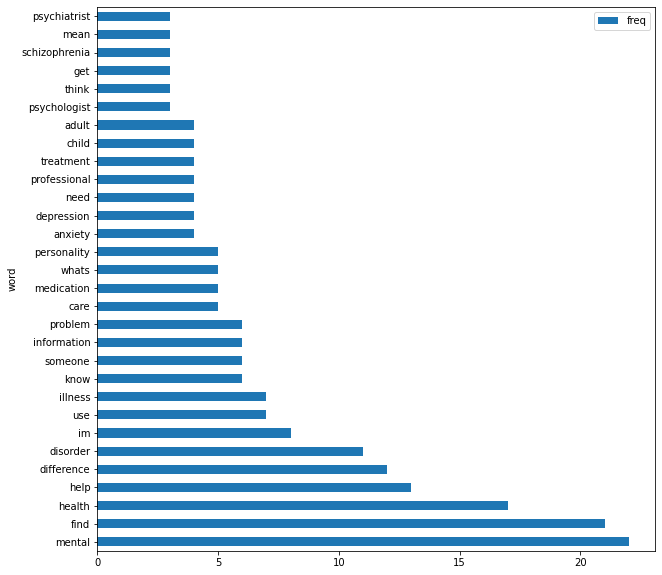

In [62]:
def dictionary(check):
    check = check.str.extractall('([a-zA_Z]+)')
    check.columns = ['check']
    b = check.reset_index(drop=True)
    check = b['check'].value_counts()
    
    dictionary = pd.DataFrame({'word': check.index, 'freq': check.values})
    dictionary.index = dictionary['word']
    dictionary.drop('word', axis = 1, inplace=True)
    dictionary.sort_values('freq', inplace= True, ascending= False)
    
    return dictionary

dictionary_clean = dictionary(df_quest['lemma'])
dictionary_clean[:30].plot(kind = 'barh',figsize = (10,10))

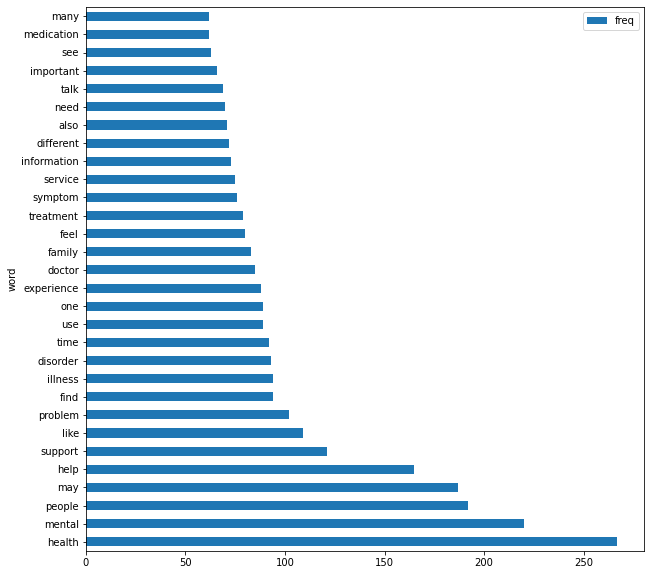

In [63]:
def dictionary(check):
    check = check.str.extractall('([a-zA_Z]+)')
    check.columns = ['check']
    b = check.reset_index(drop=True)
    check = b['check'].value_counts()
    
    dictionary = pd.DataFrame({'word': check.index, 'freq': check.values})
    dictionary.index = dictionary['word']
    dictionary.drop('word', axis = 1, inplace=True)
    dictionary.sort_values('freq', inplace= True, ascending= False)
    
    return dictionary

dictionary_clean = dictionary(df_answ['lemma'])
dictionary_clean[:30].plot(kind = 'barh',figsize = (10,10))

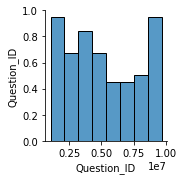

In [64]:
#viuslaizing the complete dataset
sns.pairplot(df)

In [65]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def plot_cloud(wordcloud):
    plt.figure(figsize= (20,10))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')

In [66]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
df['AnswersEncode'] = label.fit_transform(df['Answers'])
df

,Question_ID,Questions,Answers,AnswersEncode
0,1590140,What does it mean to have a mental illness?,Mental illnesses are health conditions that di...,48
1,2110618,Who does mental illness affect?,It is estimated that mental illness affects 1 ...,35
2,6361820,What causes mental illness?,It is estimated that mental illness affects 1 ...,36
3,9434130,What are some of the warning signs of mental i...,Symptoms of mental health disorders vary depen...,72
4,7657263,Can people with mental illness recover?,"When healing from mental illness, early identi...",91
...,...,...,...,...
93,4373204,How do I know if I'm drinking too much?,Sorting out if you are drinking too much can b...,69
94,7807643,"If cannabis is dangerous, why are we legalizin...","Cannabis smoke, for example, contains cancer-c...",18
95,4352464,How can I convince my kids not to use drugs?,You can't. But you can influence their capacit...,96
96,6521784,What is the legal status (and evidence) of CBD...,Cannabidiol or CBD is a naturally occurring co...,17


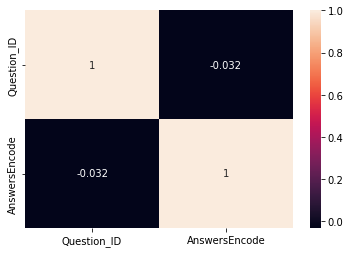

In [67]:
#heatmap of given dataset with number of coorelation between them
sns.heatmap(df.corr(),annot=True)

In [68]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC

In [70]:
text = df['Questions']
y= df['AnswersEncode'].values
tfidf = TfidfVectorizer(use_idf=True, analyzer='word', stop_words='english', token_pattern=r'\b[^\d\W]+\b', ngram_range=(1,2))
X_train = tfidf.fit_transform(text)
print(X_train)

  (0, 256)	0.33699114814760156
  (0, 248)	0.4698727395323585
  (0, 128)	0.43100736553424124
  (0, 189)	0.33699114814760156
  (0, 253)	0.24002535014672377
  (0, 246)	0.40343194383998005
  (0, 127)	0.3820427850599321
  (1, 190)	0.4494309704406547
  (1, 129)	0.4494309704406547
  (1, 9)	0.4494309704406547
  (1, 256)	0.32233038012084314
  (1, 189)	0.32233038012084314
  (1, 253)	0.22958306999074388
  (1, 127)	0.3654220498303909
  (2, 50)	0.532037746039627
  (2, 49)	0.532037746039627
  (2, 256)	0.41598363562423185
  (2, 189)	0.41598363562423185
  (2, 253)	0.29628854747330263
  (3, 360)	0.43479535353853427
  (3, 422)	0.43479535353853427
  (3, 359)	0.43479535353853427
  (3, 421)	0.43479535353853427
  (3, 256)	0.311833764912643
  (3, 189)	0.311833764912643
  :	:
  (93, 209)	0.37956061424233656
  (94, 88)	0.4544791488308225
  (94, 43)	0.4544791488308225
  (94, 218)	0.4544791488308225
  (94, 87)	0.4544791488308225
  (94, 42)	0.41688705078479515
  (95, 417)	0.3906075248419597
  (95, 208)	0.39060752

In [71]:
lsvc = LinearSVC(random_state = 2021)
lsvc.fit(X_train, y)

LinearSVC(random_state=2021)

In [72]:
search_test = ["What is the side effect of drinking?"]

search_engine = tfidf.transform(search_test)
result = lsvc.predict(search_engine)

for question in result:
    df_data = df.loc[df.isin([question]).any(axis=1)]
    print("Answer: ", df_data['Answers'].values)

Answer:  ['Sorting out if you are drinking too much can be complicated. You are unique and your relationship with alcohol is unique. No one has the same combination of life experiences and influences that you do. So even though you and your friend may choose to drink, how and why you use alcohol may be different. \n Those of us who drink, seek benefits from alcohol, not difficulties. But sometimes we start using more, and more often, than makes sense. As a general rule, drinking alcohol becomes a problem when it negatively affects our life or the lives of others. Many people imagine this refers to people who consume alcohol “all day every day.” But even drinking too much on a single occasion can lead to a problem, for instance making a poor decision such as driving while impaired. \n What’s also important to recognize is the potential for negative consequences related to drinking in various contexts (i.e., places, times and activities) and over time (e.g., coping with chronic problems)